# THE LOOK E-COMMERCE - TRAFFIC ACTIVITY ANALYSIS

In this project an analysis of the traffic activity for The Look e-commerce website was performed using thelook_ecommerce dataset from the Google bigquery-public-data repository.

Specifically, the events table was used as the main data source, as it contains session-level data about the user's online behaviour. The first part of the project was done in Google BigQuery, using SQL to create a customized 'events' table, containing the desired data, which was then extracted and saved in Python as a Pandas dataframe using bigquery and service_account packages. The obtained pandas data farme was then used to performed some analysis on the traffic activity as shown below.

Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from google.oauth2 import service_account

### Import the data from Google BigQuery

Connect to Google Big Query using a service account

In [3]:
keys = service_account.Credentials.from_service_account_file(r'C:\Users\chiar\Documents\Chiara\Boolean\02_Data_Analytics_Lessons\Final Project\keys\boolean-class-2-12c522b3444a.json')
project_id = 'boolean-class-2'
client = bigquery.Client(credentials= keys, project=project_id)

Export the events table from Google big query and store it in a pandas data frame called df_events

In [14]:
df_events = client.query(
    "SELECT * FROM `boolean-class-2.final_project.events` "
).to_dataframe()

Save the df_events data frame to a csv file called "events_raw.csv"

In [26]:
# df_events.to_csv(r'path\events_raw.csv', index=False)

First exploratory analysis

In [64]:
# make a copy of the df_events data frame
df_events_raw = df_events.copy()

In [65]:
df_events.head()

,id,user_id,session_id,created_at,city,state,country,postal_code,browser,traffic_source,uri,event_type
0,1129163,86797,a0c2a7ed-f9d0-437f-a591-4f1f84746eda,2023-05-20 08:12:07+00:00,Bogatynia,Dolnośląskie,Poland,59,Chrome,Adwords,/cart,cart
1,1486601,<NA>,732057ce-a917-4045-b66b-dbdf0421c8ec,2022-10-25 16:36:00+00:00,Bogatynia,Dolnośląskie,Poland,59,Other,Adwords,/cart,cart
2,967308,74351,465f1042-6586-4864-9f25-459942068681,2020-10-10 10:58:42+00:00,Bogatynia,Dolnośląskie,Poland,59,Firefox,Adwords,/cart,cart
3,194917,15050,99858b8f-8cee-41aa-9abf-2a6d1858cc47,2023-12-27 07:46:18+00:00,Bogatynia,Dolnośląskie,Poland,59,Safari,Adwords,/cart,cart
4,648455,49884,9a811a78-1482-4def-a22f-4f1059666cce,2023-10-07 13:40:49+00:00,Bogatynia,Dolnośląskie,Poland,59,IE,Adwords,/cart,cart


In [66]:
df_events.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486351 entries, 0 to 2486350
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   id              2486351 non-null  Int64              
 1   user_id         1333635 non-null  Int64              
 2   session_id      2486351 non-null  object             
 3   created_at      2486351 non-null  datetime64[us, UTC]
 4   city            2486351 non-null  object             
 5   state           2486351 non-null  object             
 6   country         2486251 non-null  object             
 7   postal_code     2486351 non-null  object             
 8   browser         2486351 non-null  object             
 9   traffic_source  2486351 non-null  object             
 10  uri             2486351 non-null  object             
 11  event_type      2486351 non-null  object             
dtypes: Int64(2), datetime64[us, UTC](1), object(9)
memory us

Almost half of the users navigating the website has null value for user_id: this means they are not registered to the website.

### Data Cleansing

The user_id column has null values for all the users that navigate the e-commerce website without being registered. To have a clean data frame, let's replace the null values in the df_events with "Not registered" string

In [67]:
# replace the null values in the user_id column with 0
df_events['user_id'] = [0 if pd.isna(id) else id for id in df_events['user_id']]
df_events.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486351 entries, 0 to 2486350
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   id              2486351 non-null  Int64              
 1   user_id         2486351 non-null  int64              
 2   session_id      2486351 non-null  object             
 3   created_at      2486351 non-null  datetime64[us, UTC]
 4   city            2486351 non-null  object             
 5   state           2486351 non-null  object             
 6   country         2486251 non-null  object             
 7   postal_code     2486351 non-null  object             
 8   browser         2486351 non-null  object             
 9   traffic_source  2486351 non-null  object             
 10  uri             2486351 non-null  object             
 11  event_type      2486351 non-null  object             
dtypes: Int64(1), datetime64[us, UTC](1), int64(1), object(9)

In [69]:
# create a new column where users are divided between registered and not registered
df_events['registered'] = ['not registered' if id==0 else 'registered' for id in df_events['user_id']]
df_events.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486351 entries, 0 to 2486350
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   id              2486351 non-null  Int64              
 1   user_id         2486351 non-null  int64              
 2   session_id      2486351 non-null  object             
 3   created_at      2486351 non-null  datetime64[us, UTC]
 4   city            2486351 non-null  object             
 5   state           2486351 non-null  object             
 6   country         2486251 non-null  object             
 7   postal_code     2486351 non-null  object             
 8   browser         2486351 non-null  object             
 9   traffic_source  2486351 non-null  object             
 10  uri             2486351 non-null  object             
 11  event_type      2486351 non-null  object             
 12  registered      2486351 non-null  object             
dt

In [70]:
df_events.sample(10)

,id,user_id,session_id,created_at,city,state,country,postal_code,browser,traffic_source,uri,event_type,registered
575196,49282,3810,960c3b3c-7fe5-46e4-a083-941e0343b3c8,2023-10-28 07:59:41+00:00,Fort Lauderdale,Florida,United States,33311,Chrome,Adwords,/department/women/category/maternity/brand/bel...,department,registered
1463568,1702541,0,fdbf7595-d06c-4656-a2e4-14faa0fef5ff,2023-06-20 01:51:00+00:00,Houston,Texas,United States,77338,IE,Email,/product/23349,product,not registered
1518864,1084153,83270,279689bc-cb46-496f-8ca4-0b0c86bc6d06,2023-08-05 06:36:30+00:00,Dalton,Georgia,United States,30721,Firefox,YouTube,/department/men/category/shorts/brand/columbia,department,registered
947484,2139661,0,db50509d-1dc7-4108-b218-551928191e00,2021-08-10 07:35:00+00:00,Tianjin,Guangdong,China,528313,Chrome,Email,/department/women/category/swim/brand/seafolly,department,not registered
1345736,50714,3926,f8cb66ce-1376-40e9-af54-481cb6658f9e,2020-01-15 10:52:53+00:00,Pingxiang,Guangdong,China,510435,Firefox,Email,/cart,cart,registered
54781,973974,74855,69f3c527-0a45-47ca-a9ef-4afa14e06362,2022-08-27 02:24:39+00:00,Paudalho,Pernambuco,Brasil,55825-000,IE,YouTube,/cart,cart,registered
868350,2115659,0,47ee6a94-1055-4916-993b-43bb9b445a7f,2023-03-11 01:04:00+00:00,Four-stage,Hebei,China,62552,Safari,Email,/product/21813,product,not registered
1993772,1989442,0,898d5d47-35a2-4a62-ad53-461d3ab13ddb,2021-01-19 06:26:00+00:00,Fort Worth,Texas,United States,76114,Chrome,YouTube,/cancel,cancel,not registered
2436513,1627055,0,0fd5bc98-c30d-4fdb-aab4-bf798d9baa5c,2021-04-24 16:43:00+00:00,Huainan,Tianjin,China,300393,Chrome,Email,/department/men/category/fashionhoodies&sweats...,department,not registered
728486,780461,59903,abc39784-69b1-43be-806c-bb9e3d1bc2ba,2021-09-16 12:31:16+00:00,null,Pernambuco,Brasil,55730-000,IE,Email,/department/women/category/jeans/brand/kutfrom...,department,registered


### Data Analysis and visualization

#### Which parts of the website are the most visited?

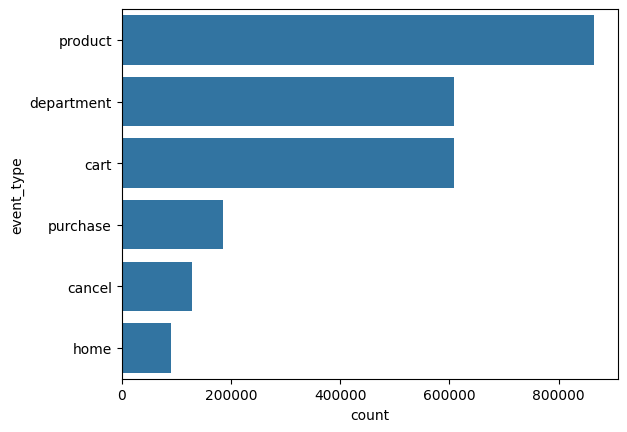

In [71]:
sns.countplot(data=df_events, y='event_type', order=df_events['event_type'].value_counts().index)
plt.show()

In [109]:
print('Number of visits per section:\n')
for section in df_events['event_type'].unique():
    cnt = len(df_events[df_events['event_type']==str(section)])
    pcg = round((cnt / len(df_events['event_type']))*100, 2)
    print(str(section), ':', cnt, '(', pcg, '%', 'of total events)')

Number of visits per section:

cart : 608637 ( 24.48 % of total events)
home : 89777 ( 3.61 % of total events)
cancel : 127970 ( 5.15 % of total events)
product : 865031 ( 34.79 % of total events)
purchase : 185977 ( 7.48 % of total events)
department : 608959 ( 24.49 % of total events)


Let's divide the above statistics between registered and non-registered users

In [108]:
non_reg = len(df_events[df_events['registered']=='not registered'])
non_reg_pctg = round((non_reg/len(df_events))*100, 2)
print('Number of non registered users:', non_reg, '(', non_reg_pctg, '%', 'of total)')
reg = len(df_events)-non_reg
reg_pctg = 100-non_reg_pctg
print('Number of registered users:', reg, '(', reg_pctg, '%', 'of total)')

Number of non registered users: 1152716 ( 46.36 % of total)
Number of registered users: 1333635 ( 53.64 % of total)


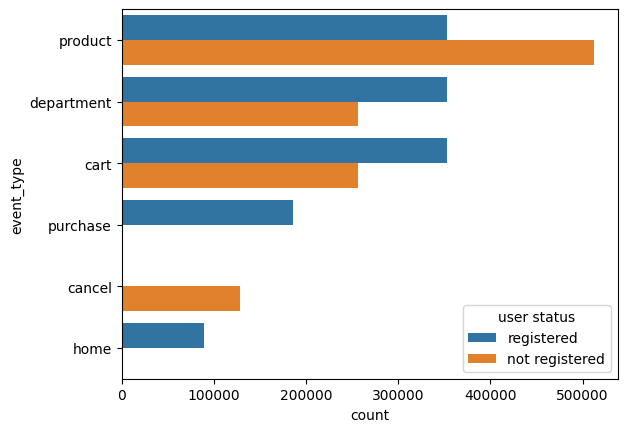

In [76]:
sns.countplot(data=df_events, y='event_type', hue='registered', order=df_events['event_type'].value_counts().index)
plt.legend(title='user status')
plt.show()

In [100]:
print('Number of visits per section:\n')
data_list = []
for u in df_events['registered'].unique():
    df_u = df_events[df_events['registered']==u]
    for s in df_u['event_type'].unique():
        cnt = len(df_u[df_u['event_type']==s])
        pcg = int((cnt / len(df_u['event_type']))*100)
        data_list.append({'user type':u, 'section':s, 'No. visits':cnt, 'pctg':pcg})
        section_df = pd.DataFrame(data_list)
section_df

Number of visits per section:



,user type,section,No. visits,pctg
0,registered,cart,352627,26
1,registered,home,89777,6
2,registered,product,352627,26
3,registered,purchase,185977,13
4,registered,department,352627,26
5,not registered,cart,256010,22
6,not registered,cancel,127970,11
7,not registered,product,512404,44
8,not registered,department,256332,22


As shown in chart above, the same rank of visited department is applicable for both registered and non-registered users, with the last ones showing a higher number of visits to the product section, and less visists to department and cart sections compared to registered users. It's worth noticing that non-registered users do not purhase on the e-commerce website even if they add products to the cart: this might mean that the website does not allow non-registered users to complete orders. In order to increase the amount of sales, it may be useful to either encourage non-registered users to created an account (i.e. by offering a discount on their first order upon creating a new account) or allow them to purchase items even without a registered account.

##### Where is the traffic coming from?

This question might be interpreted in 2 different ways:

- Wich country is the traffic coming from?
- Which source is the traffic coming from (i.e. which source brought the users to the website)?

Let's start with the geografical question:

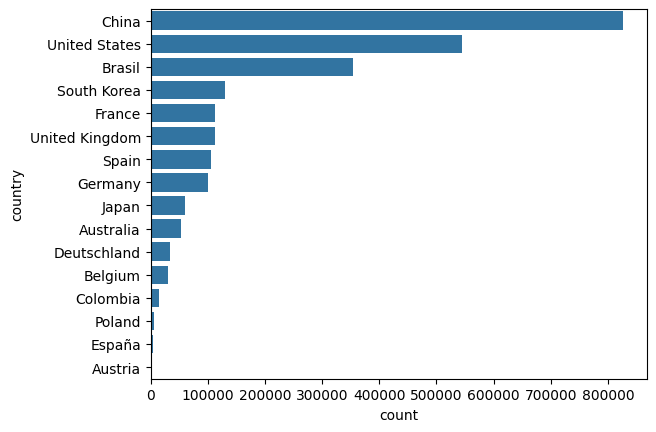

In [84]:
sns.countplot(data=df_events, y='country', order=df_events['country'].value_counts().index)
plt.show()

In [95]:
data_list = []
for c in df_events['country'].unique():
    count_visits = len(df_events[df_events['country']==c])
    data_list.append({'country': c, 'count of visits': count_visits})
traffic_country = pd.DataFrame(data_list)
traffic_country = traffic_country.sort_values(by='count of visits', ascending=False, ignore_index=True)
traffic_country['percentage of visits'] = round((traffic_country['count of visits']/sum(traffic_country['count of visits']))*100, 2)
traffic_country.head()

,country,count of visits,percentage of visits
0,China,826403,33.24
1,United States,545107,21.92
2,Brasil,353283,14.21
3,South Korea,130581,5.25
4,France,112016,4.51


China, US and Brazil are the countries where most of the traffic (almost 70%) comes from. Same trend is observed for both registered and non-registered users.

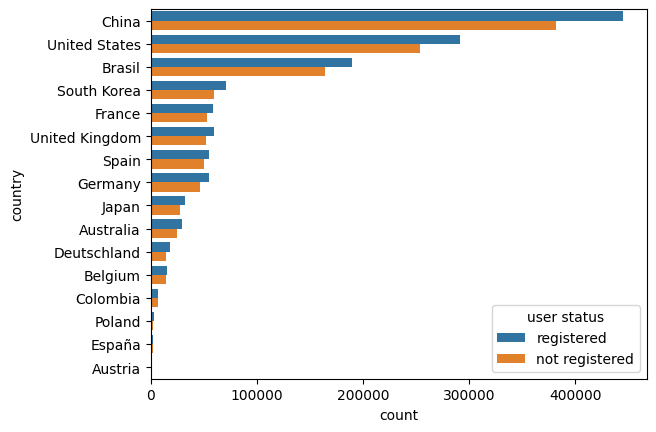

In [103]:
sns.countplot(data=df_events, y='country', hue='registered', order=df_events['country'].value_counts().index)
plt.legend(title='user status', loc='lower right')
plt.show()

Which source is the traffic coming from (i.e. which source brought the users to the website)?

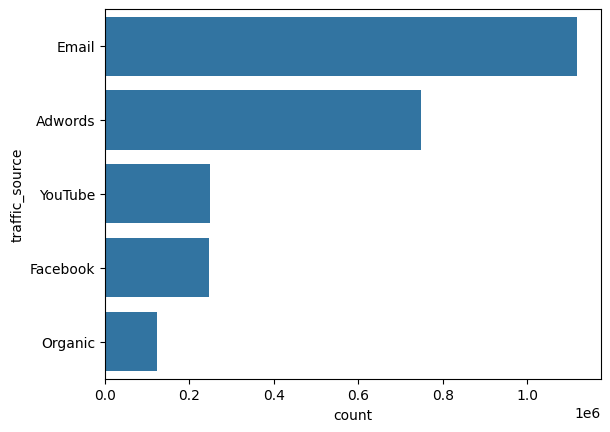

In [101]:
sns.countplot(data=df_events, y='traffic_source', order=df_events['traffic_source'].value_counts().index)
plt.show()

In [104]:
data_list = []
for t in df_events['traffic_source'].unique():
    count_visits = len(df_events[df_events['traffic_source']==t])
    data_list.append({'traffic source': t, 'count of visits': count_visits})
traffic_source_df = pd.DataFrame(data_list)
traffic_source_df = traffic_source_df.sort_values(by='count of visits', ascending=False, ignore_index=True)
traffic_source_df['percentage of visits'] = round((traffic_country['count of visits']/sum(traffic_country['count of visits']))*100, 2)
traffic_source_df.head()

,traffic source,count of visits,percentage of visits
0,Email,1118838,33.24
1,Adwords,748850,21.92
2,YouTube,249021,14.21
3,Facebook,246586,5.25
4,Organic,123056,4.51


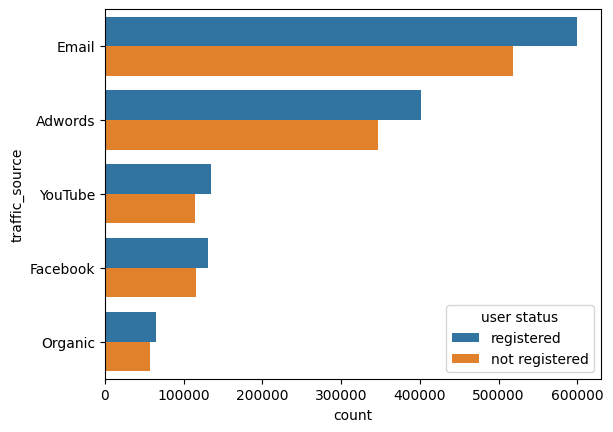

In [105]:
sns.countplot(data=df_events, y='traffic_source', hue='registered', order=df_events['traffic_source'].value_counts().index)
plt.legend(title='user status', loc='lower right')
plt.show()

As shown in the above charts, email and adwords are the 2 main sources used by either registered or not registered users to reach the e-commerce website. Therefore sending emails or investing in enlarnging the adwords usage to encourage users to purchase items from the e-commerce website (i.e. with discounts, limited offers etc...) may be a good strategy to increase the amount of sales.